Identificacion de Imagenes con Redes Neuronales

Grupo 2:

- Esteban Daniel Pereira Nuñez
- Maria Bernarda Serrano Larrea
- Damaris Raquel Terrazas Teran
- Oscar Enrique Ibañez Siñani

Librerias
- pip install opencv-contrib-python
- pip install tensorflow (actualmente se requiere Python 3.7)
- pip install matplotlib
- pip install tqdm
- pip install numpy
- pip install pickle

Descomprimir PetImages.zip para importar las imagenes dentro

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

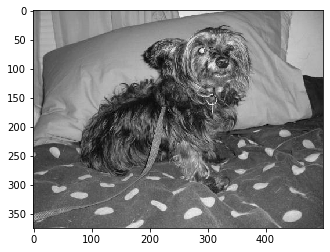

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]
(375, 500)


In [5]:
DATADIR = "PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)  # se crea el path a las carpetas de perros y gatos
    for img in os.listdir(path):  # iterar sobre cada archivo en estas carpetas
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convertir en un array
        plt.imshow(img_array, cmap='gray')  # graficar
        plt.show()  # mostrar

        break  # solo mostramos el primero
    break 

print(img_array)

print(img_array.shape)

(100, 100)


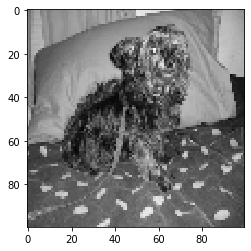

In [6]:
IMG_SIZE = 100 # definimos un tamaño nuevo para la imagen

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # se ajusta el tamaño de la imagen
print(new_array.shape)
plt.imshow(new_array, cmap='gray') # Graficamos y mostramos la nueva imagen
plt.show()

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  # clasificamos los resultados (un 0 o un 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # pasamos por cada imagen
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convertimos las imagenes en arrays
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # ajustamos el tamaño de las imagenes
                training_data.append([new_array, class_num])  # añadimos la imagen a la lista de datos de muestra
            except Exception as e: 
                pass

create_training_data()

print(len(training_data))

100%|█████████████████████████████████████████████████████████████| 104/104 [00:00<00:00, 433.58it/s]208



In [5]:
import random

random.shuffle(training_data) # mezclamos los datos para mejorar el aprendizaje de la red neuronal

for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
1
0
0
0
0
1


In [6]:
X = []
y = []

for features,label in training_data: # guardamos las imagenes como X y las clasificaciones como Y
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[15]
   [18]
   [16]
   ...
   [ 3]
   [ 4]
   [ 3]]

  [[16]
   [19]
   [18]
   ...
   [ 4]
   [ 5]
   [ 2]]

  [[16]
   [19]
   [17]
   ...
   [ 3]
   [ 2]
   [ 1]]

  ...

  [[48]
   [53]
   [56]
   ...
   [ 2]
   [ 8]
   [ 9]]

  [[54]
   [54]
   [57]
   ...
   [ 7]
   [13]
   [11]]

  [[51]
   [50]
   [54]
   ...
   [12]
   [14]
   [12]]]]


In [7]:
import pickle

# guardamos los datos en archivos
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)